In [143]:
from sklearn import datasets
iris = datasets.load_iris()

iris['feature_names'] = [name.capitalize() for name in iris['feature_names']]
iris['target_names'] = [name.capitalize() for name in iris['target_names']]
print('Data shape\t: {}'.format(iris['data'].shape))
print('Column name\t: {}'.format(iris['feature_names']))
print('Total class\t: {}'.format(len(iris['target_names'])))
print('Class name\t: {}'.format({i : iris['target_names'][i] for i in range(len (iris['target_names'])) }))
print('Sample target\t: {}'.format(iris['target'][:5])) 
print('Sample data\t: \n{}'.format(iris['data'][:5]))

Data shape	: (150, 4)
Column name	: ['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)']
Total class	: 3
Class name	: {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
Sample target	: [0 0 0 0 0]
Sample data	: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


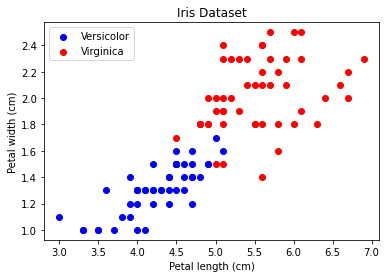

In [142]:
import matplotlib.pyplot as plt

versicolor_virginica_mask = (iris['target'] != 0) 
data = iris['data'][versicolor_virginica_mask] 
target = iris['target'][versicolor_virginica_mask]

colors = {1: 'b', 2: 'r'}   
fig, ax = plt.subplots() 
for target_class in [1, 2]:
    mask = (target == target_class)
    ax.scatter(data[mask, 2], data[mask, 3], color=colors[target_class],
               label=iris['target_names'][target_class])
    
ax.set_title('Iris Dataset') 
ax.set_xlabel(iris['feature_names'][2]) 
ax.set_ylabel(iris['feature_names'][3])

ax.legend()
plt.show()

In [144]:
import numpy as np
from sklearn.linear_model import LogisticRegression

data_length = len(data)
index = np.arange(data_length) 
np.random.seed(2023) 
np.random.shuffle(index)
train_index = index[:data_length//2] 
test_index = index[data_length//2:]

classifier = LogisticRegression(random_state=2023)
classifier.fit(data[train_index], target[train_index])
prediction = classifier.predict(data[test_index])
print(prediction)

[2 1 2 2 2 1 2 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 2 2 1 2 2 2 1 2
 1 2 1 1 2 2 1 2 2 2 2 1 2]


In [145]:
from sklearn.metrics import classification_report
target_names = iris['target_names'][1:] 
print(classification_report(target[test_index], prediction, target_names=target_names))

              precision    recall  f1-score   support

  Versicolor       0.95      0.95      0.95        20
   Virginica       0.97      0.97      0.97        30

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



In [146]:
print('Iris Dataset - Ground Truth: ', target[test_index])
print('Iris Dataset - Prediction: ', prediction)

Iris Dataset - Ground Truth:  [2 1 2 2 2 1 2 2 1 2 1 2 2 1 1 2 2 2 2 1 1 2 2 2 2 1 1 1 1 2 2 1 2 2 2 1 2
 1 2 1 1 2 2 1 2 1 2 2 1 2]
Iris Dataset - Prediction:  [2 1 2 2 2 1 2 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 2 2 1 2 2 2 1 2
 1 2 1 1 2 2 1 2 2 2 2 1 2]


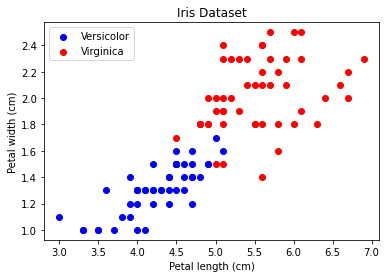

In [147]:
fig, ax = plt.subplots() 

colors = {1: 'b', 2: 'r'}   
for target_class in [1, 2]:
    mask = (target == target_class)
    ax.scatter(data[mask, 2], data[mask, 3], color=colors[target_class],
               label=iris['target_names'][target_class])
ax.set_title('Iris Dataset') 
ax.set_xlabel(iris['feature_names'][2]) 
ax.set_ylabel(iris['feature_names'][3])

ax.legend()
plt.show()

In [148]:
# fig, ax = plt.subplots() 

# ax.scatter(data[test_index, 2], data[test_index, 3], color='y')
# ax.set_title('Iris Dataset - (Prediction)') 
# ax.set_xlabel(iris['feature_names'][2]) 
# ax.set_ylabel(iris['feature_names'][3])

# ax.legend()
# plt.show()

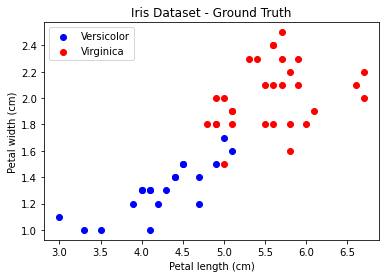

In [149]:
fig, ax = plt.subplots()

gtem = (target[test_index] == 1)
ax.scatter(data[test_index][gtem][:, 2], data[test_index][gtem][:, 3], color='b', label='Versicolor')

gtim = (target[test_index] == 2)
ax.scatter(data[test_index][gtim][:, 2], data[test_index][gtim][:, 3], color='r', label='Virginica')

ax.set_title('Iris Dataset - Ground Truth')
ax.set_xlabel(iris['feature_names'][2])
ax.set_ylabel(iris['feature_names'][3])

ax.legend()
plt.show()

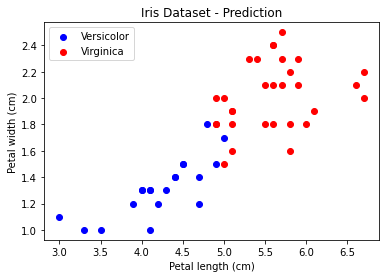

In [150]:
fig, ax = plt.subplots()

tdem = (prediction == 1)
ax.scatter(data[test_index][tdem][:, 2], data[test_index][tdem][:, 3], color='b', label='Versicolor')

tdim = (prediction == 2)
ax.scatter(data[test_index][tdim][:, 2], data[test_index][tdim][:, 3], color='r', label='Virginica')

ax.set_title('Iris Dataset - Prediction')
ax.set_xlabel(iris['feature_names'][2])
ax.set_ylabel(iris['feature_names'][3])

ax.legend()
plt.show()